# Trabajo Fin de Grado - DACYA

## Control de Sistemas Multiagente y sus Aplicaciones

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import math as math

import networkx as nx

from sympy import symbols, Matrix

In [14]:
# G = nx.Graph()
# G.add_nodes_from([1,2,3,4])
# G.add_edges_from([(1,2),(2,3),(3,4),(4,1),(1,3),(2,4)])

# posnode = {1: (0, 1), 2: (1, 0), 3: (0, -1), 4: (-1, 0)}

# plt.figure(1, figsize=(3,3))

# nx.draw(G, pos=posnode, with_labels=True)

# edge_name={(1, 2): 'e1', (2, 3): 'e4', (3, 4): 'e6', (4, 1): 'e3', (1, 3): 'e2', (2, 4): 'e5'}
# nx.draw_networkx_edges(G, pos=posnode, edgelist=edge_name.keys())
# nx.draw_networkx_edge_labels(G, pos=posnode, edge_labels=edge_name)

# plt.show()

### Configuration Matrices

In [15]:
vertices = {1,2,3,4,5} # Vertices
edges = {(1,2),(1,3),(1,4),(2,3),(2,4),(3,4),(3,5),(4,5)} # Edges

In [16]:
# Each vertex position 
p1 = np.array([0,0])
p2 = np.array([0,1])
p3 = np.array([1,0])
p4 = np.array([1,1])
p5 = np.array([1.5,0.5])


pt = np.array([p1,p2,p3,p4,p5])


pbar = np.column_stack((pt,np.ones(5))).astype(float)
pbar

array([[0. , 0. , 1. ],
       [0. , 1. , 1. ],
       [1. , 0. , 1. ],
       [1. , 1. , 1. ],
       [1.5, 0.5, 1. ]])

### Incidence Matrix

In [17]:
list(enumerate(edges))

[(0, (2, 4)),
 (1, (1, 2)),
 (2, (3, 4)),
 (3, (1, 4)),
 (4, (2, 3)),
 (5, (4, 5)),
 (6, (1, 3)),
 (7, (3, 5))]

In [18]:
H=np.zeros([len(vertices),len(edges)])
for i in enumerate(edges):
    H[i[1][0]-1,i[0]] = -1
    H[i[1][1]-1,i[0]] = 1


In [19]:
edges

{(1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4), (3, 5), (4, 5)}

In [20]:
print(H)
print(edges)
edges

[[ 0. -1.  0. -1.  0.  0. -1.  0.]
 [-1.  1.  0.  0. -1.  0.  0.  0.]
 [ 0.  0. -1.  0.  1.  0.  1. -1.]
 [ 1.  0.  1.  1.  0. -1.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  1.]]
{(2, 4), (1, 2), (3, 4), (1, 4), (2, 3), (4, 5), (1, 3), (3, 5)}


{(1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4), (3, 5), (4, 5)}

In [21]:
H = np.array([[1,1,1,0,0,0,0,0],[-1,0,0,1,1,0,1,0],[0,-1,0,-1,0,1,0,0],[0,0,-1,0,-1,-1,0,1],[0,0,0,0,0,0,-1,-1]]) # rows --> nodes, columns --> edges.
Hm = Matrix(H)
Hm

Matrix([
[ 1,  1,  1,  0,  0,  0,  0,  0],
[-1,  0,  0,  1,  1,  0,  1,  0],
[ 0, -1,  0, -1,  0,  1,  0,  0],
[ 0,  0, -1,  0, -1, -1,  0,  1],
[ 0,  0,  0,  0,  0,  0, -1, -1]])

In [22]:
Matrix(np.transpose(H) @ np.ones([5,1]).astype(float)) # condición a cumplir --> 0

Matrix([
[0],
[0],
[0],
[0],
[0],
[0],
[0],
[0]])

## Stress Matrix


In [23]:
Omega = np.array([[1, -1, 1, -1],[-1, 1, -1, 1],[1, -1, 1, -1],[-1, 1, -1, 1]])
Matrix(Omega)

Matrix([
[ 1, -1,  1, -1],
[-1,  1, -1,  1],
[ 1, -1,  1, -1],
[-1,  1, -1,  1]])

### Laplacian

In [24]:
N=4
wij=np.random.rand(N,N) # Usando una matriz rand ya que aún no se ha calculado wij


def laplacian(N,wij):
    laplacian=np.zeros([N,N])

    for i in range(N):
        for j in range(N):
            if i==j:
                if i==0:
                    laplacian[i,j]=wij[i,i+1]
                elif i==N-1:
                    laplacian[i,j]=wij[i,i-1]
                else:
                    laplacian[i,j]=wij[i,i+1]+wij[i,i-1]
            elif i!=j and j==i+1 or j==i-1:
                laplacian[i,j]=-wij[i,j]
            else:
                laplacian[i,j]=0
    return laplacian




In [25]:
Matrix(laplacian(4,Omega))

Matrix([
[-1.0,  1.0,    0,    0],
[ 1.0, -2.0,  1.0,    0],
[   0,  1.0, -2.0,  1.0],
[   0,    0,  1.0, -1.0]])

In [26]:
Matrix(laplacian(N,Omega).astype(int)*np.ones([4,1]).astype(int))

Matrix([
[-1,  1,  0,  0],
[ 1, -2,  1,  0],
[ 0,  1, -2,  1],
[ 0,  0,  1, -1]])

In [27]:
laplacian(N,Omega).astype(int) @ np.ones([4,1]).astype(int)

array([[0],
       [0],
       [0],
       [0]])

In [28]:
np.diag(Hm)

array([1, 0, 0, 0, 0], dtype=object)

In [29]:
pbarm.transpose()

NameError: name 'pbarm' is not defined

In [ ]:
Hm.transpose()[:,0]

Matrix([
[1],
[1],
[1],
[0],
[0],
[0],
[0],
[0]])

In [ ]:
Matrix(np.diagflat(Hm.transpose()[:,0])) # np.diagflat() para diag(h_i)

Matrix([
[1, 0, 0, 0, 0, 0, 0, 0],
[0, 1, 0, 0, 0, 0, 0, 0],
[0, 0, 1, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0]])

In [ ]:
for i in range(5):
    pbarm.transpose()*Hm*np.diagflat(Hm.transpose()[:,i])


In [ ]:
E = Matrix([pbarm.transpose()*Hm*np.diagflat(Hm.transpose()[:,0]),pbarm.transpose()*Hm*np.diagflat(Hm.transpose()[:,1]),pbarm.transpose()*Hm*np.diagflat(Hm.transpose()[:,2]),pbarm.transpose()*Hm*np.diagflat(Hm.transpose()[:,3]),pbarm.transpose()*Hm*np.diagflat(Hm.transpose()[:,4])])

In [ ]:
E=np.asarray(E).astype(float)

In [ ]:
rango = np.linalg.matrix_rank(E)
E

array([[ 0. , -1. , -1. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [-1. ,  0. , -1. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. , -1. , -1. ,  0. , -1.5,  0. ],
       [ 1. ,  0. ,  0. ,  1. ,  0. ,  0. ,  0.5,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  1. ,  0. ,  1. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. , -1. ,  0. , -1. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  1. ,  0. ,  1. ,  0. ,  0. , -0.5],
       [ 0. ,  0. ,  1. ,  0. ,  0. ,  1. ,  0. ,  0.5],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  1.5,  0.5],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. , -0.5, -0.5],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ]])

In [ ]:
#calculamos ahora la descomposicion en valores singulares de E,
U,S,Vt = np.linalg.svd(E,full_matrices= True) #no es necesario full matrices
filas = Vt.shape[0]
#y el espacio nullo de E (Cada columna de Z un vector de la base del
# espacio Nulo)
Z = Vt[rango:filas,:].T
#comprbación de que Z expande el Null(E)
print(E@Z)
Z

[[-5.55111512e-17]
 [ 2.49800181e-16]
 [ 0.00000000e+00]
 [-5.55111512e-17]
 [ 2.77555756e-16]
 [ 0.00000000e+00]
 [ 1.11022302e-16]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 3.33066907e-16]
 [-4.99600361e-16]
 [ 0.00000000e+00]
 [-2.22044605e-16]
 [ 1.38777878e-16]
 [ 0.00000000e+00]
 [ 2.22044605e-16]
 [-5.55111512e-17]
 [ 0.00000000e+00]
 [-3.33066907e-16]
 [-1.11022302e-16]
 [ 0.00000000e+00]]


AttributeError: 'NoneType' object has no attribute 'T'

In [ ]:
Matrix(E).nullspace()

[Matrix([
 [ 1.0],
 [ 1.0],
 [-1.0],
 [-1.0],
 [ 1.0],
 [   1],
 [   0],
 [   0]])]

In [ ]:
from picos import RealVariable, Problem

prob = Problem()
X = RealVariable('X', pbar.shape)
prob.add_constraint(X == pbar)
prob.solve(verbosity = 0)
X_value = X.value
U,S,V = np.linalg.svd(X_value)

In [ ]:
Matrix(U)

Matrix([
[-0.226848915628901,  0.273679144422304, -0.771920667950075,  -0.244842393365183, -0.466722594470192],
[-0.353733691374797,  0.767664064030434, 0.0882416149266289, -0.0841596419899687,  0.520283511595263],
[-0.423121239857875, -0.361983491045478, -0.435816898010693,   0.573844428720334,   0.41316167734512],
[-0.550006015603771,  0.132001428562652,  0.424345384866011,    0.41316167734512, -0.573844428720334],
[-0.584699789845311, -0.432822348975304,  0.162316128397351,  -0.658004070710303,  0.107121834250143]])

In [ ]:
U1 = U[:,0:3]
U2 = U[:,3:]
U2

array([[-0.24484239, -0.46672259],
       [-0.08415964,  0.52028351],
       [ 0.57384443,  0.41316168],
       [ 0.41316168, -0.57384443],
       [-0.65800407,  0.10712183]])

In [ ]:
Ue, Se, Ve =  np.linalg.svd(np.array(E).astype(int))

In [ ]:
Matrix(Ue)

Matrix([
[   0.312328471490177,     -0.39882090942552,   0.0892802371371145,     0.288675134594812,                  -0.5,    -0.196092198694019,    0.296639244720272, -0.0490421185756819,   0,   0.049281456202096,   0.446286028263664,   0,  0.267649979983194,   0,   0],
[   0.312328471490177,     -0.39882090942552,   0.0892802371371126,    -0.577350269189626, -6.16284564391687e-17,    -0.196092198694019,   -0.258425431945003,    0.44580524686616,   0,   0.134704113618118,  -0.211939821856222,   0,   0.18720751938134,   0,   0],
[1.63709959005088e-17,  6.61704782385398e-17, 1.23726742876449e-16, -4.14158260464835e-17, -8.71654564711668e-17, -1.71529074992459e-17,    0.829384628912725,   0.271183063772837,   0,  0.0545988679238473,  -0.478441500046191,   0, -0.081814289100765,   0,   0],
[   0.463228162539707,     0.452875008071048,   -0.553899043037701,  1.01264141850756e-15, -3.85453868832345e-16,    0.0281509127628426,  0.00254431660570473, -0.0987459629222646,   0,   0.2829323036619

In [ ]:
U2.T@H

array([[-0.16068275, -0.81868682, -0.65800407, -0.65800407, -0.49732132,
         0.16068275,  0.57384443,  1.07116575],
       [-0.98700611, -0.87988427,  0.10712183,  0.10712183,  1.09412794,
         0.98700611,  0.41316168, -0.68096626]])

In [ ]:
(np.array([U2]).T*H)

array([[[-0.24484239, -0.24484239, -0.24484239, -0.        ,
         -0.        , -0.        , -0.        , -0.        ],
        [ 0.08415964, -0.        , -0.        , -0.08415964,
         -0.08415964, -0.        , -0.08415964, -0.        ],
        [ 0.        , -0.57384443,  0.        , -0.57384443,
          0.        ,  0.57384443,  0.        ,  0.        ],
        [ 0.        ,  0.        , -0.41316168,  0.        ,
         -0.41316168, -0.41316168,  0.        ,  0.41316168],
        [-0.        , -0.        , -0.        , -0.        ,
         -0.        , -0.        ,  0.65800407,  0.65800407]],

       [[-0.46672259, -0.46672259, -0.46672259, -0.        ,
         -0.        , -0.        , -0.        , -0.        ],
        [-0.52028351,  0.        ,  0.        ,  0.52028351,
          0.52028351,  0.        ,  0.52028351,  0.        ],
        [ 0.        , -0.41316168,  0.        , -0.41316168,
          0.        ,  0.41316168,  0.        ,  0.        ],
        [-0.  

In [ ]:
Matrix(U2.T@H)

Matrix([
[-0.160682751375214, -0.818686822085517, -0.658004070710303, -0.658004070710303, -0.497321319335089, 0.160682751375214, 0.573844428720334,   1.07116574805542],
[-0.987006106065455, -0.879884271815312,  0.107121834250143,  0.107121834250143,    1.0941279403156, 0.987006106065454,  0.41316167734512, -0.680966262970477]])

In [ ]:
Matrix(np.diagflat(E.nullspace()[0]).astype(int))

AttributeError: 'numpy.ndarray' object has no attribute 'nullspace'

In [ ]:
Matrix(H.T*U2)

Matrix([
[0.5,  0.5,    0,    0],
[0.5,    0,  0.5,    0],
[0.5,    0,    0, -0.5],
[  0, -0.5,  0.5,    0],
[  0, -0.5,    0, -0.5],
[  0,    0, -0.5, -0.5]])

In [ ]:
Matrix(np.array([U2]).T*H @ np.diagflat(E.nullspace()[0]).astype(int))

Matrix([
[0.5, 0.5, -0.5,    0,    0,    0],
[0.5,   0,    0,  0.5, -0.5,    0],
[  0, 0.5,    0, -0.5,    0, -0.5],
[  0,   0,  0.5,    0, -0.5, -0.5]])

In [ ]:
M = Matrix(U2.T @ H @ np.diagflat(Matrix(E).nullspace()[0]).astype(int)@ H.T @ U2)

In [ ]:
M = Matrix(U2.T @ H @ np.diagflat(E.nullspace()[0]).astype(int)@ H.T @ U2)

In [ ]:
Mar = np.asarray(M).astype(float)
M.nullspace()


[]

In [ ]:
Matrix(np.array([[1,2,3],[2,4,6],[3,6,9]])).nullspace()[1]

Matrix([
[-3],
[ 0],
[ 1]])

In [ ]:
#calculamos la descomposicion SVD de Pr_b
#y creamos una lista de matrices Mi
M = []
Up,Sp,Vtp = np.linalg.svd(pbar)
U2 = Up[:,pt.shape[1]+1:]
for i in Z.T:
    M.append(U2.T @ H @ np.diag(i) @ H.T @ U2)

NameError: name 'Z' is not defined

In [ ]:
M

[array([[0.04216216, 0.25898432],
        [0.25898432, 1.590831  ]])]

In [ ]:
import picos
#planteamos un bonito problema LMI en picos    
P = picos.Problem()

c = picos.RealVariable("c",len(M))
M_L = [picos.Constant(Mi) for Mi in M]
S = picos.sum(M_L[i]*c[i] for i in range(len(M_L)))
P.add_constraint(S>>0)
print(P)
P.solve()

#esto puede dar errores ojo
cn = np.array([c.np])

#Construimos el vector de pesos y la matriz de pesos.
w = [sum(Z[:,i]*cn[i] for i in range(Z.shape[1]))]
w = w[0]
Omg = H @ np.diag(w) @ H.T 

A = [(1,2),(1,3),(1,4),(2,3),(2,4),(3,4),(3,5),(4,5)]
#dibujamos que siempre ayuda...
plt.plot(pt[:,0],pt[:,1],'o')
for i in enumerate(pt):
    plt.gca().text(i[1][0]+0.01,i[1][1]+0.01,str(i[0]+1))
for i in enumerate(A):
    plt.plot(pt[[i[1][0]-1,i[1][1]-1],0],pt[[i[1][0]-1,i[1][1]-1],1])
    plt.gca().text(np.mean(pt[[i[1][0]-1,i[1][1]-1],0]),\
        np.mean(pt[[i[1][0]-1,i[1][1]-1],1]),str(w[i[0]])[0:6],\
            rotation=180*np.arctan2(pt[i[1][0]-1,1]-pt[i[1][1]-1,1],\
                                pt[i[1][0]-1,0]-pt[i[1][1]-1,0])/np.pi)

NameError: name 'M' is not defined

NameError: name 'A' is not defined

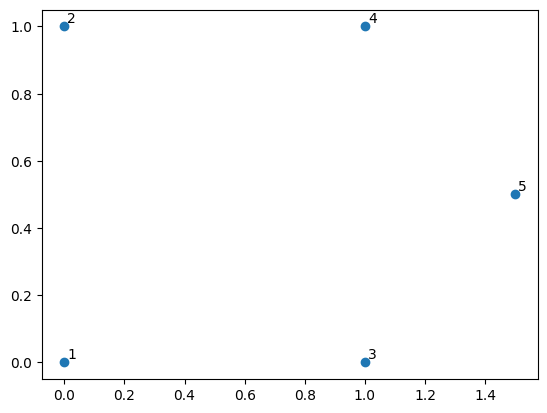

In [ ]:
plt.plot(pt[:,0],pt[:,1],'o')
for i in enumerate(pt):
    plt.gca().text(i[1][0]+0.01,i[1][1]+0.01,str(i[0]+1))

for i in enumerate(A):
    plt.plot(pt[[i[1][0]-1,i[1][1]-1],0],pt[[i[1][0]-1,i[1][1]-1],1])

In [ ]:
Matrix(Omg)

Matrix([
[ 0.249999996050208,   -0.249999996050208, -0.249999996050208,    0.249999996050208,                    0],
[-0.249999996050208,    0.249999996050208,  0.249999996050208,   -0.249999996050208, -6.7986996701388e-17],
[-0.249999996050208,    0.249999996050208,  0.249999996050208,   -0.249999996050208,                    0],
[ 0.249999996050208,   -0.249999996050208, -0.249999996050208,    0.249999996050208, 5.94886221137145e-17],
[                 0, -6.7986996701388e-17,                  0, 5.94886221137145e-17,  8.4983745876735e-18]])

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Sat Apr 27 19:39:47 2024

@author: abierto
"""

#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Wed Mar 22 16:33:38 2020
Ejemplo de obtención vector de stress para el paper de Zhao
Usando picos
@author: juanjimenez
"""
import numpy as np
import matplotlib 
import matplotlib.pyplot as pl
import picos

#creamos la matriz de incidencia en su caso tiene 7 vertices
V = {1,2,3,4,5,6,7} 
#y 12 aristas
A = [(1,2),(1,3),(1,4),(1,5),(2,4),(2,7),(3,5),(3,6),(4,5),(4,6),(5,7),(6,7)] 
# Hemos orientado el grafo por tanto.
# creamos la configuracion, le damos directamente la forma de P(r)
Pr = np.array([[2,0],[1,1],[1,-1],[0,1],[0,-1],[-1,1],[-1,-1]])

H=np.zeros([len(V),len(A)])
for i in enumerate(A):
    H[i[1][0]-1,i[0]] = -1
    H[i[1][1]-1,i[0]] = 1
#Nuestra matriz de incidencia es la traspueta de la que define Zhao!!!


Pr_b = np.append(Pr,np.ones([Pr.shape[0],1]),axis=1)

#calculamos la matriz E 
E =Pr_b.T @ H @ np.diag(H[0,:])
for i in range(1,len(V)):
    E =np.append(E,Pr_b.T @ H @ np.diag(H[i,:]),axis=0)

#calculamos ahora el subespacio nulo de E
#primero calculamos el rango de E, así sabemos a partir de qué vector
#columna de la matriz V E=U@S@V.T, empieza la base del kernel de A.
rango = np.linalg.matrix_rank(E)

#calculamos ahora la descomposicion en valores singulares de E,
U,S,Vt = np.linalg.svd(E,full_matrices= True) #no es necesario full matrices
filas = Vt.shape[0]
#y el espacio nullo de E (Cada columna de Z un vector de la base del
# espacio Nulo)
Z = Vt[rango:filas,:].T
#comprbación de que Z expande el Null(E)
print(E@Z)

#calculamos la descomposicion SVD de Pr_b
#y creamos una lista de matrices Mi
M = []
Up,Sp,Vtp = np.linalg.svd(Pr_b)
U2 = Up[:,Pr.shape[1]+1:]
for i in Z.T:
    M.append(U2.T @ H @ np.diag(i) @ H.T @ U2)
    
#planteamos un bonito problema LMI en picos    
P = picos.Problem()

c = picos.RealVariable("c",len(M))
M_L = [picos.Constant(Mi) for Mi in M]
S = picos.sum(M_L[i]*c[i] for i in range(len(M_L)))
P.add_constraint(S>>0)
print(P)
P.solve()

#esto puede dar errores ojo
cn = np.array([c.np])

#Construimos el vector de pesos y la matriz de pesos.
w = [sum(Z[:,i]*cn[i] for i in range(Z.shape[1]))]
w = w[0]
Omg = H @ np.diag(w) @ H.T    

[[-5.55111512e-17]
 [ 2.49800181e-16]
 [ 0.00000000e+00]
 [-5.55111512e-17]
 [ 2.77555756e-16]
 [ 0.00000000e+00]
 [ 1.11022302e-16]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 3.33066907e-16]
 [-4.99600361e-16]
 [ 0.00000000e+00]
 [-2.22044605e-16]
 [ 1.38777878e-16]
 [ 0.00000000e+00]
 [ 2.22044605e-16]
 [-5.55111512e-17]
 [ 0.00000000e+00]
 [-3.33066907e-16]
 [-1.11022302e-16]
 [ 0.00000000e+00]]
Feasibility Problem
  find an assignment
  for
    1×1 real variable c
  subject to
    [4×4]·c[0] ≽ 0


In [ ]:
w = [sum(Z[:,i]*cn[i] for i in range(Z.shape[1]))]
w[0]


array([ 0.2962963 ,  0.2962963 , -0.14814815, -0.14814815,  0.59259259,
       -0.14814815,  0.59259259, -0.14814815,  0.07407407,  0.2962963 ,
        0.2962963 ,  0.14814815])

[[-4.44089210e-16]
 [-5.55111512e-17]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [-1.66533454e-16]
 [ 0.00000000e+00]
 [ 1.78122341e-16]
 [ 1.15888872e-17]
 [ 0.00000000e+00]
 [ 2.22044605e-16]
 [ 1.66533454e-16]
 [ 0.00000000e+00]
 [ 4.39222640e-17]
 [ 4.39222640e-17]
 [ 0.00000000e+00]]
Feasibility Problem
  find an assignment
  for
    1×1 real variable c
  subject to
    [2×2]·c[0] ≽ 0


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 14 is different from 10)

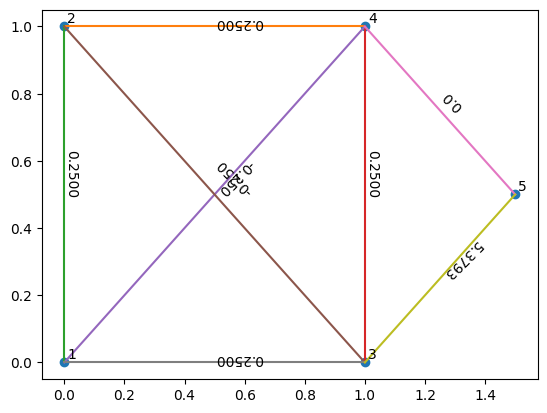

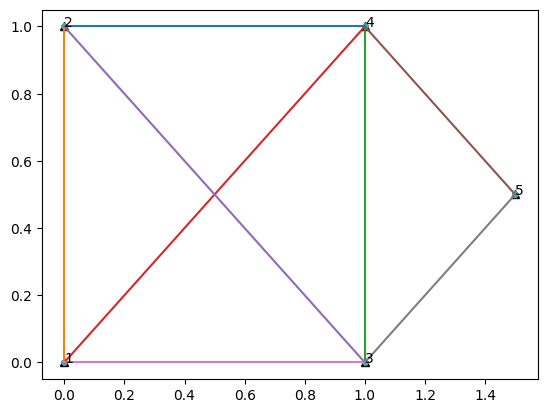

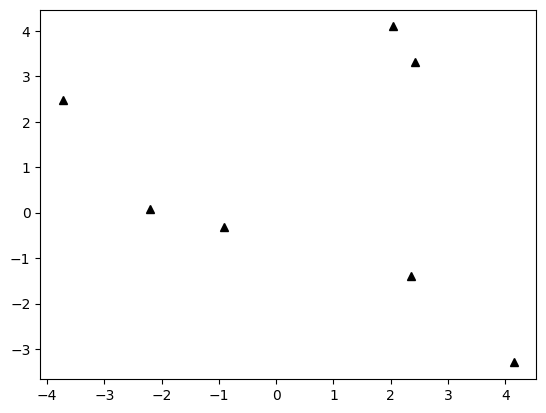

In [31]:
# -*- coding: utf-8 -*-
"""
Created on Sat Apr 27 19:39:47 2024

@author: abierto
"""

#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Wed Mar 22 16:33:38 2020
Ejemplo de obtención vector de stress para el paper de Zhao
Usando picos
@author: juanjimenez
"""
import numpy as np
import matplotlib 
import matplotlib.pyplot as pl
import picos

#creamos la matriz de incidencia en su caso tiene 7 vertices
V = vertices
#y 12 aristas
A = edges
# Hemos orientado el grafo por tanto.
# creamos la configuracion, le damos directamente la forma de P(r)
Pr = pt
H=np.zeros([len(V),len(A)])
for i in enumerate(A):
    H[i[1][0]-1,i[0]] = -1
    H[i[1][1]-1,i[0]] = 1
#Nuestra matriz de incidencia es la traspueta de la que define Zhao!!!


Pr_b = np.append(Pr,np.ones([Pr.shape[0],1]),axis=1)

#calculamos la matriz E 
E =Pr_b.T @ H @ np.diag(H[0,:])
for i in range(1,len(V)):
    E =np.append(E,Pr_b.T @ H @ np.diag(H[i,:]),axis=0)

#calculamos ahora el subespacio nulo de E
#primero calculamos el rango de E, así sabemos a partir de qué vector
#columna de la matriz V E=U@S@V.T, empieza la base del kernel de A.
rango = np.linalg.matrix_rank(E)

#calculamos ahora la descomposicion en valores singulares de E,
U,S,Vt = np.linalg.svd(E,full_matrices= True) #no es necesario full matrices
filas = Vt.shape[0]
#y el espacio nullo de E (Cada columna de Z un vector de la base del
# espacio Nulo)
Z = Vt[rango:filas,:].T
#comprbación de que Z expande el Null(E)
print(E@Z)

#calculamos la descomposicion SVD de Pr_b
#y creamos una lista de matrices Mi
M = []
Up,Sp,Vtp = np.linalg.svd(Pr_b)
U2 = Up[:,Pr.shape[1]+1:]
for i in Z.T:
    M.append(U2.T @ H @ np.diag(i) @ H.T @ U2)
    
#planteamos un bonito problema LMI en picos    
P = picos.Problem()

c = picos.RealVariable("c",len(M))
M_L = [picos.Constant(Mi) for Mi in M]
S = picos.sum(M_L[i]*c[i] for i in range(len(M_L)))
P.add_constraint(S>>0)
print(P)
P.solve()

#esto puede dar errores ojo
cn = np.array([c.np])

#Construimos el vector de pesos y la matriz de pesos.
w = [sum(Z[:,i]*cn[i] for i in range(Z.shape[1]))]
w = w[0]
Omg = H @ np.diag(w) @ H.T    
#dibujamos que siempre ayuda...
pl.plot(Pr[:,0],Pr[:,1],'o')
for i in enumerate(Pr):
    pl.gca().text(i[1][0]+0.01,i[1][1]+0.01,str(i[0]+1))
for i in enumerate(A):
    pl.plot(Pr[[i[1][0]-1,i[1][1]-1],0],Pr[[i[1][0]-1,i[1][1]-1],1])
    pl.gca().text(np.mean(Pr[[i[1][0]-1,i[1][1]-1],0]),\
        np.mean(Pr[[i[1][0]-1,i[1][1]-1],1]),str(w[i[0]])[0:6],\
            rotation=180*np.arctan2(Pr[i[1][0]-1,1]-Pr[i[1][1]-1,1],\
                                Pr[i[1][0]-1,0]-Pr[i[1][1]-1,0])/np.pi)
#que pasa si empezamos en la configuracion deseada
pl.figure()

Prs = np.reshape(Pr,[2*Pr.shape[0],1]) #posisciones de referencia apiladas
P = Prs.copy()
pl.plot(P[0::2,0],P[1::2,0],'^k',linewidth =0.1)
dt = 0.01

tf = 100
tp = tf/1000
t = 0
I = np.eye(2)

Pc = P

################no se mueve estan en el kernel de los pesos####################
while t <= tf:
    t += dt
    if t >= tp:
        pl.plot(Pc[0::2,0],Pc[1::2,0],'.',linewidth =0.1)
        tp += tf/1000
    #consenso lo ejecuto siempre como referencia
        
    Pc = -10*np.kron(Omg,I)@Pc*dt + Pc    
    

Pst = np.array([Pc[0::2,0],Pc[1::2,0]]).T
for i in enumerate(Pst):
    pl.gca().text(i[1][0],i[1][1],str(i[0]+1))
for i in enumerate(A):
    pl.plot(Pst[[i[1][0]-1,i[1][1]-1],0],Pst[[i[1][0]-1,i[1][1]-1],1])
# ###################################################################

#por último podemos probar por euler que empezando en codiciones arbitrarias el
#sistema converge a la configuraación deseada
pl.figure()
P  = 10*np.random.rand(14,1)-5 #posiciones iniciales
Prs = np.reshape(Pr,[2*Pr.shape[0],1]) #posisciones de referencia apiladas

pl.plot(P[0::2,0],P[1::2,0],'^k',linewidth =0.1)
dt = 0.01

tf = 100
tp = tf/1000
t = 0
I = np.eye(2)

Pc = P

################consenso######################################
while t <= tf:
    t += dt
    if t >= tp:
        pl.plot(Pc[0::2,0],Pc[1::2,0],'.',linewidth =0.1)
        tp += tf/1000
    #consenso lo ejecuto siempre como referencia
        
    Pc = -10*np.kron(Omg,I)@Pc*dt + Pc    
    

Pst = np.array([Pc[0::2,0],Pc[1::2,0]]).T
for i in enumerate(Pst):
    pl.gca().text(i[1][0],i[1][1],str(i[0]+1))
for i in enumerate(A):
    pl.plot(Pst[[i[1][0]-1,i[1][1]-1],0],Pst[[i[1][0]-1,i[1][1]-1],1])
# ###################################################################

In [32]:
Matrix(Omg)

Matrix([
[ 0.250000010491167, -0.250000010491167,    -0.250000010491167,  0.250000010491167,                     0],
[-0.250000010491167,  0.250000010491167,     0.250000010491167, -0.250000010491167,                     0],
[-0.250000010491167,  0.250000010491167,     0.250000010491167, -0.250000010491167, -5.37935698358132e-17],
[ 0.250000010491167, -0.250000010491167,    -0.250000010491167,  0.250000010491167,                     0],
[                 0,                  0, -5.37935698358132e-17,                  0,  5.37935698358132e-17]])

In [ ]:
laplacian(7,w)

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed